In [1]:
pwd

'/home/tim/work/su-thesis-project/projects/video_analysis/python/notebooks'

In [3]:
cd ..

/home/tim/work/su-thesis-project/projects/video_analysis/python


In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from sql_handling.execute_sql import execute_sql_pandas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy

# Paths

In [7]:
# path to save figures
output_path = '/home/tim/work/su-thesis-project/projects/video_analysis/python/notebooks/'

# Global configuration path
glob_conf_path = 'global_config.py'

# Load global variables

In [8]:
exec(open(glob_conf_path).read())

# Select data from DB

In [10]:
query = """SELECT filename,
success,
confidence,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r,
AU01_c,
AU02_c,
AU04_c,
AU05_c,
AU06_c,
AU07_c,
AU09_c,
AU10_c,
AU12_c,
AU14_c,
AU15_c,
AU17_c,
AU20_c,
AU23_c,
AU25_c,
AU26_c,
AU28_c,
AU45_c,
video_id,
mix,
emotion_1,
mode,
intensity_level,
version
FROM openface;"""
df = execute_sql_pandas(query)

In [11]:
df

,filename,success,confidence,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,...,AU25_c,AU26_c,AU28_c,AU45_c,video_id,mix,emotion_1,mode,intensity_level,version
0,A050121-R_adm_p_1,1,0.98,0.0,0.0,0.58,0.00,1.47,1.08,0.00,...,0.0,0.0,0.0,0.0,A050121-R,0,adm,p,1,1
1,A050121-R_adm_p_3,1,0.98,0.0,0.0,0.76,0.00,1.97,2.12,0.00,...,0.0,0.0,0.0,0.0,A050121-R,0,adm,p,3,1
2,A050121-R_adm_p_4,1,0.98,0.0,0.0,0.50,0.00,0.75,0.00,0.42,...,0.0,0.0,0.0,0.0,A050121-R,0,adm,p,4,1
3,A050121-R_adm_v_1,1,0.98,0.0,0.0,0.81,0.00,1.65,1.13,0.00,...,0.0,0.0,0.0,0.0,A050121-R,0,adm,v,1,1
4,A050121-R_adm_v_2,1,0.98,0.0,0.0,0.74,0.00,1.89,2.09,0.62,...,0.0,0.0,0.0,0.0,A050121-R,0,adm,v,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281730,A205_sad_v_3,1,0.98,0.0,0.0,0.00,0.02,1.23,0.76,0.28,...,0.0,0.0,0.0,0.0,A205,0,sad,v,3,1
2281731,A205_sad_v_3,1,0.98,0.0,0.0,0.00,0.02,1.18,0.77,0.26,...,0.0,0.0,0.0,0.0,A205,0,sad,v,3,1
2281732,A205_sad_v_3,1,0.98,0.0,0.0,0.00,0.06,1.16,0.86,0.22,...,0.0,0.0,0.0,0.0,A205,0,sad,v,3,1
2281733,A205_sad_v_3,1,0.98,0.0,0.0,0.00,0.04,1.13,0.94,0.18,...,0.0,0.0,0.0,0.0,A205,0,sad,v,3,1


Total number of instances: 2281735

Number of Instances per File (before data cleaning)
A205_sad_v_3         1549
A205_sad_v_4         1437
A205_fea_v_1         1218
A223_ple_v_4         1216
A205_sad_v_1         1214
                     ... 
A303_hap_v_1           37
A34_int_v_1            37
A050121-R_fea_p_1      33
A337_cont_v_1          33
A303_tri_v_1           27
Name: filename, Length: 10711, dtype: int64



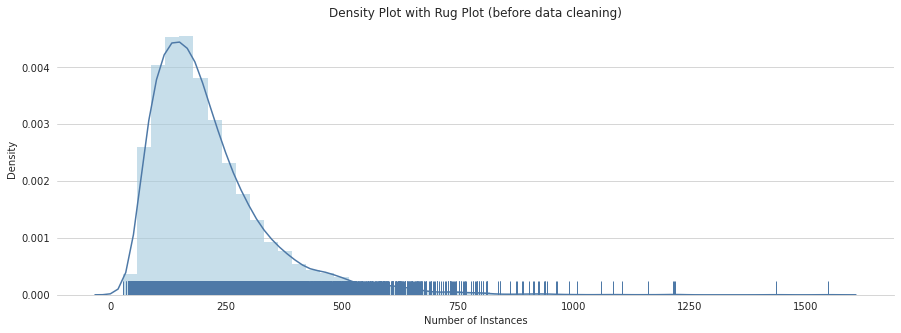


Number of Instances per Actor (before data cleaning)
A55          166818
A223         154845
A205         140611
A102         108187
A220          97009
A64           92938
A67           89402
A26           88772
A101          83876
A221          82945
A327          76103
A218          74126
A72           73363
A207          70749
A103          68863
A74           67712
A200          65459
A91           62413
A334          61897
A75           57505
A323          57200
A65           56634
A18           54289
A227          53018
A201          50658
A332          44868
A303          40495
A337          39105
A21           37276
A34           34083
A050121-R     30516
Name: video_id, dtype: int64


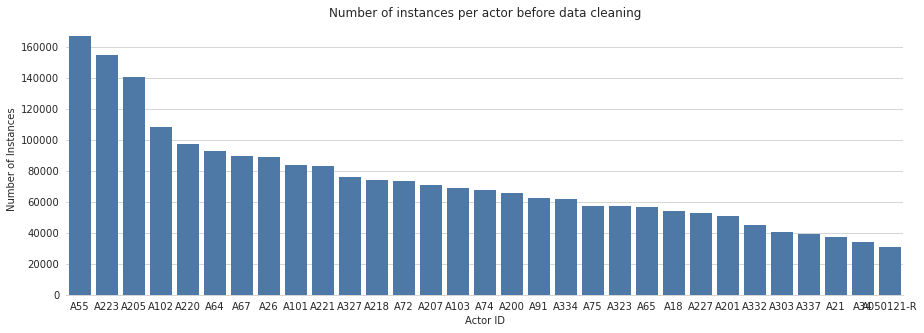


Number of Instances per Emotion (before data cleaning)
ang        144971
disg       116895
fea         94888
hap         67913
conc        55520
dou         54613
sad         54456
nos         53314
sha         51767
pea         51586
gui         50554
anx         50357
mov         49922
emb         49885
awe         48533
env         48416
conf        47971
bor         47887
reg         47295
hop         47060
disa        47006
neu         46133
sat         46002
ele         45833
ten         45721
scha        45609
ins         45597
ple         45491
neg_sur     44892
sex         44538
pos_sur     44250
det         43964
cont        43909
dist        43733
rej         43090
adm         42747
gra         42716
rel         41982
amu         41678
int         41320
pri         41282
exc         40874
sar         40039
tri         39526
Name: emotion_1, dtype: int64


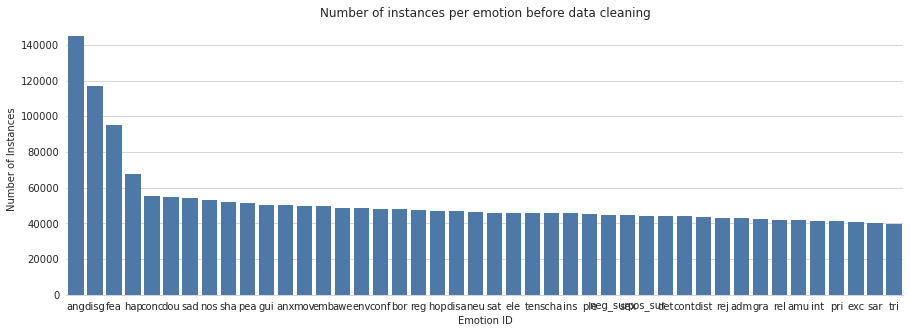


Number of Instances per Success Status (before data cleaning)
1    2270342
0      11393
Name: success, dtype: int64


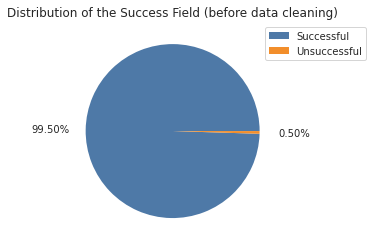


Percentage of Instances per Confidence Rate (before data cleaning)
0.00    0.000929
0.03    0.003145
0.08    0.000009
0.12    0.000032
0.17    0.000006
0.22    0.000061
0.28    0.000058
0.32    0.000038
0.38    0.000054
0.43    0.000036
0.47    0.000062
0.52    0.000060
0.57    0.000114
0.62    0.000105
0.68    0.000177
0.73    0.000156
0.77    0.000747
0.82    0.001118
0.88    0.019221
0.93    0.049948
0.98    0.923925
Name: confidence, dtype: float64


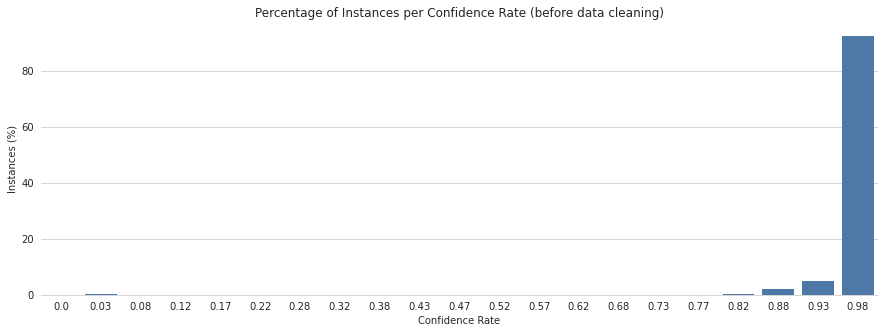

In [12]:
print("Total number of instances: {}".format(len(df)))
print()


print("Number of Instances per File (before data cleaning)")
file_val_counts_original = df["filename"].value_counts()
print(file_val_counts_original)
print()


x = file_val_counts_original.values
plt.figure(figsize=(15,5))
sns.distplot(x, rug=True, norm_hist=True,
             rug_kws={'color': blue_shades[0],'alpha':1},
             kde_kws={'color': blue_shades[0],'alpha':1},
             hist_kws={'color': blue_shades[1], 'alpha':0.6}
            )
plt.xlabel('Number of Instances')
plt.ylabel('Density')
plt.grid(False,axis='x')
plt.savefig(os.path.join(output_path,'charts','report_distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.title('Density Plot with Rug Plot (before data cleaning)')
plt.savefig(os.path.join(output_path,'charts','distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()


print("Number of Instances per Actor (before data cleaning)")
actor_val_counts_original = df["video_id"].value_counts()
print(actor_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(actor_val_counts_original.index, actor_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per actor before data cleaning")
plt.xlabel('Actor ID')
plt.ylabel('Number of Instances')
plt.show()
print()


print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()


print("Number of Instances per Success Status (before data cleaning)")
success_val_counts_original = df["success"].value_counts()
print(success_val_counts_original)
plt.figure()
plt.pie(success_val_counts_original.values, autopct='%1.2f%%', pctdistance= 1.4, colors=palette_def)
plt.legend(['Successful','Unsuccessful'],bbox_to_anchor=(0.9, 1))
plt.savefig(os.path.join(output_path,'charts','report_success_before_cleaning.svg'), bbox_inches = 'tight')
plt.title("Distribution of the Success Field (before data cleaning)")
plt.savefig(os.path.join(output_path,'charts','success_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()

print("Percentage of Instances per Confidence Rate (before data cleaning)")
confidence_val_counts_original = df["confidence"].value_counts(normalize=True).sort_index()
print(confidence_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(confidence_val_counts_original.index, 100*confidence_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.xlabel('Confidence Rate')
plt.ylabel('Instances (%)')
plt.savefig(os.path.join(output_path,'charts','report_confidence_before_cleaning.svg'), bbox_inches = 'tight')
plt.title("Percentage of Instances per Confidence Rate (before data cleaning)")
plt.savefig(os.path.join(output_path,'charts','confidence_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()

# Data cleaning

In this section, we will clean the dataset. For this purpose, we will remove those instances that do not satisfy the following two conditions:

* Success == 1
* Confidence rate >= 0.98

In [18]:
print("Number of Instances per Actor id (before data cleaning)")
actor_val_counts_original = df[['video_id','filename']].groupby(["video_id"]).filename.nunique().reset_index()
print(actor_val_counts_original)
print()

Number of Instances per Actor id (before data cleaning)
     video_id  filename
0   A050121-R       344
1        A101       349
2        A102       353
3        A103       344
4         A18       344
5        A200       335
6        A201       343
7        A205       335
8        A207       341
9         A21       331
10       A218       330
11       A220       339
12       A221       339
13       A223       331
14       A227       338
15        A26       355
16       A303       326
17       A323       341
18       A327       337
19       A332       318
20       A334       325
21       A337       347
22        A34       341
23        A55       575
24        A64       340
25        A65       338
26        A67       319
27        A72       338
28        A74       340
29        A75       328
30        A91       347



In [19]:
confidence_th = 0.98 

df_tmp = pd.DataFrame()
rows_tmp = [r for index,r in df.iterrows() if (r["success"] == 1 and r["confidence"] >= confidence_th)]
df_tmp = pd.DataFrame(rows_tmp)

df_tmp.to_csv(output_path + 'video_data_step_1_cleaned_dataset.csv', index=None, header=True)

KeyboardInterrupt: 